<a href="https://colab.research.google.com/github/WilliamNdoni/loan_approval_prediction_kaggle/blob/main/loan_approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN APPROVAL PREDICTION

## 1. Business Understanding.

Determining whether a person should be granted a loan is one of the most crucial tasks in banks. Given information such as the customer's (loanee) income, loan history, and employment status, banks determine whether the customer is eligible for a loan and/or the amount of loan the person is eligible to receive.

This process can be streamlined using machine learning, reducing the burden on banks to manually determine the eligibility of a loanee. Machine learning models can be trained on customer data, such as income, loan history, and employment status, to predict whether a customer qualifies for a loan and determine the amount they are eligible to receive.

To begin, a dataset containing information such as customers' income, employment status, loan intent, and other relevant details will be required to train the model. The trained model will then be tested for accuracy and reliability. Once validated, it can be deployed to assist in approving bank customers' loan applications efficiently and effectively.

Such datasets are readily available on platforms like Kaggle. However, banks can leverage their own internal databases to train a model, ensuring it is tailored to their specific customer base and loan approval criteria.

This project will utilize a dataset from Kaggle to train and test a machine learning model aimed at achieving the desired goal of automating loan approval.


## 2. Data Understanding.


The dataset used for this project was obtained from Kaggle and contains relevant columns such as ***person_income***, ***person_home_ownership, loan_intent, and loan_int_rate (loan interest rate)***. The dataset will undergo preprocessing and cleaning to ensure its quality before being used to train the machine learning model.

In [1]:
# Loading and taking a look at the dataset
# Importing pandas
import pandas as pd
loan_df = pd.read_csv("/content/drive/MyDrive/loan_approval_prediction_kaggle/train.csv")
loan_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [2]:
# Taking a look at the columns
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

Majority of the columns in the datatset are numerical.

The dataset conatains **58645** rows with 13 columns.

Once the model is trained, it will be evaluated using a separate test dataset also provided by Kaggle.

In [3]:
# Checking for missing values
loan_df.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


The dataset has no missing values.

In [4]:
# Checking for duplicates
loan_df.duplicated(subset='id').sum() # Making id the subset since they should be unique

0

The dataset has no duplicates.

### Exploratory Data Analysis (EDA).

##### Univariate EDA.

In [5]:
# Exploring the summary statistics
loan_df.describe().round(2)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.0,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00,58645.00
mean,29322.0,27.55,64046.17,4.70,9217.56,10.68,0.16,5.81,0.14
std,16929.5,6.03,37931.11,3.96,5563.81,3.03,0.09,4.03,0.35
min,0.0,20.00,4200.00,0.00,500.00,5.42,0.00,2.00,0.00
25%,14661.0,23.00,42000.00,2.00,5000.00,7.88,0.09,3.00,0.00
50%,29322.0,26.00,58000.00,4.00,8000.00,10.75,0.14,4.00,0.00
75%,43983.0,30.00,75600.00,7.00,12000.00,12.99,0.21,8.00,0.00
max,58644.0,123.00,1900000.00,123.00,35000.00,23.22,0.83,30.00,1.00


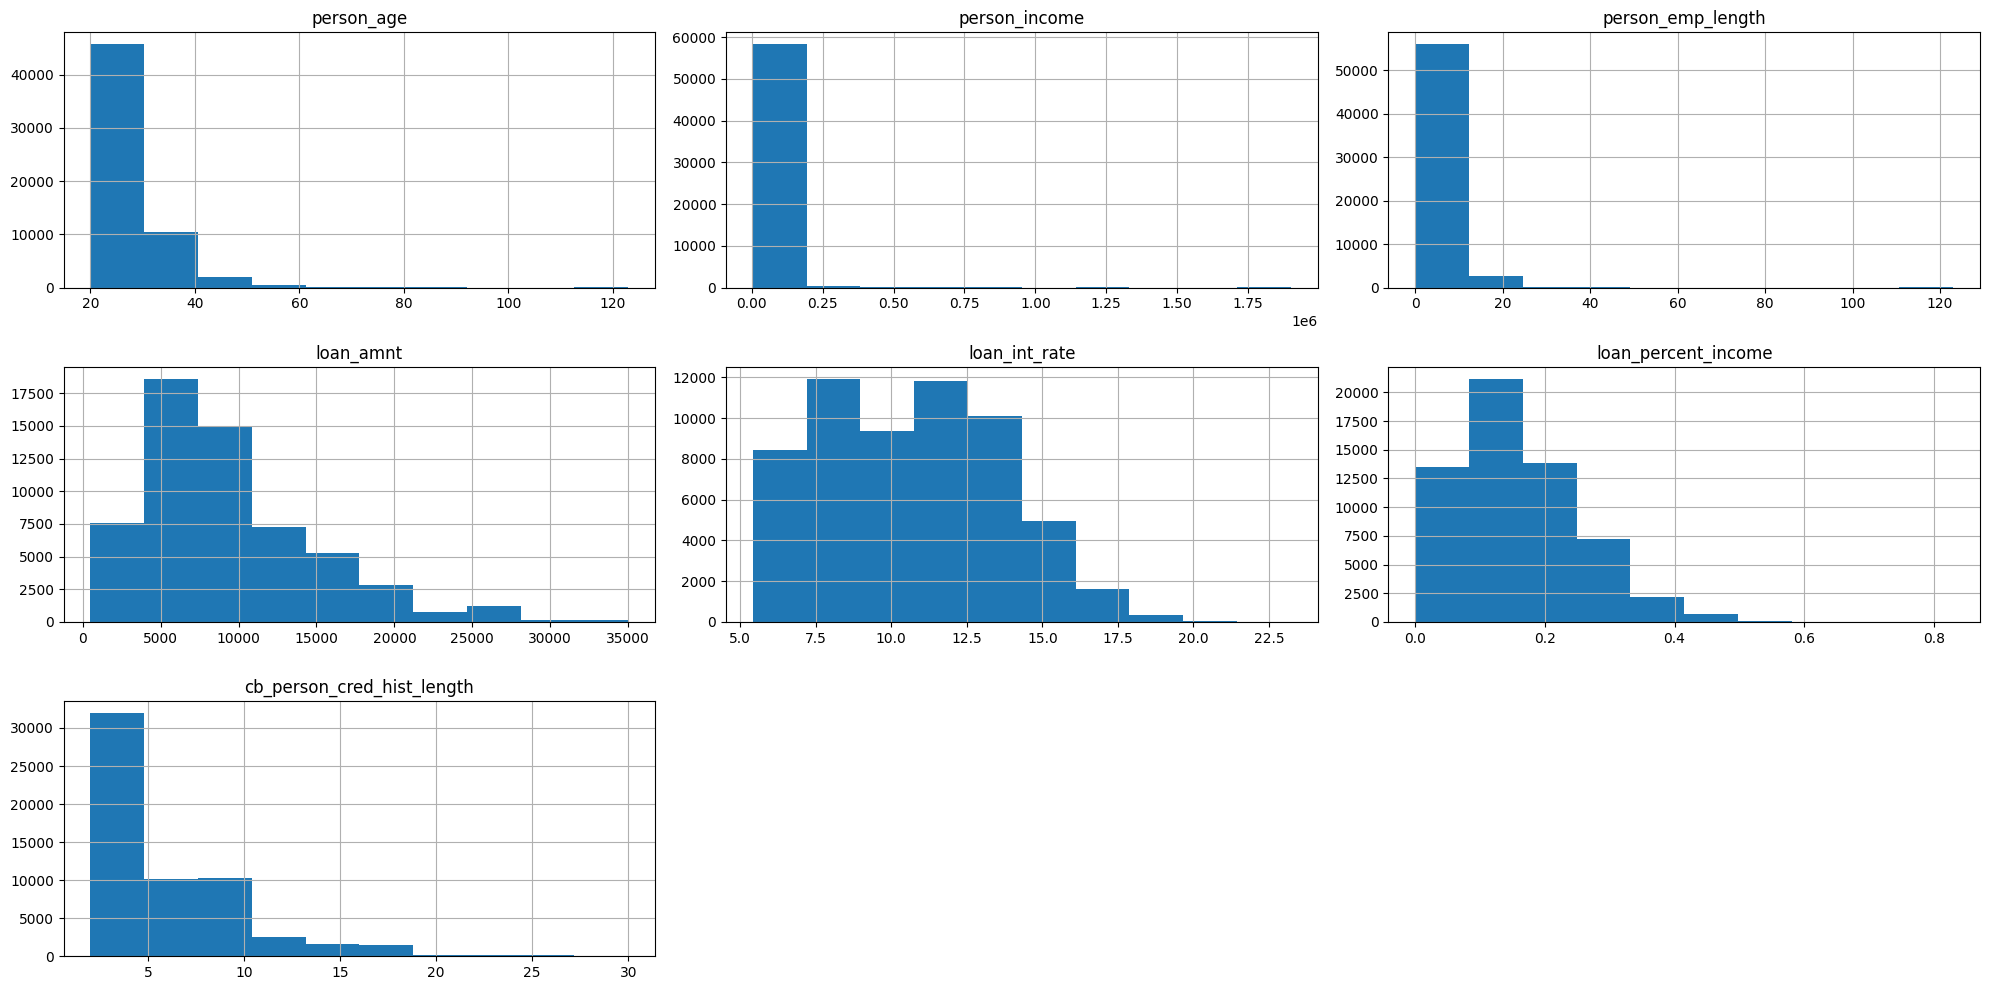

In [6]:
# Visualising the distributuion of the numerical variables.
# Importing the relevant libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histograms for all the numerical variables
loan_df_hist = loan_df.drop(['id','loan_status'],axis=1)
loan_df_hist.hist(figsize=(20,10))
plt.tight_layout()
plt.show()

From the visuals it can be seen that all the numerical variables are not normaly distributed.

This has to be dealt with during data cleaning. To get a better visual of the outliers we will use boxplots.

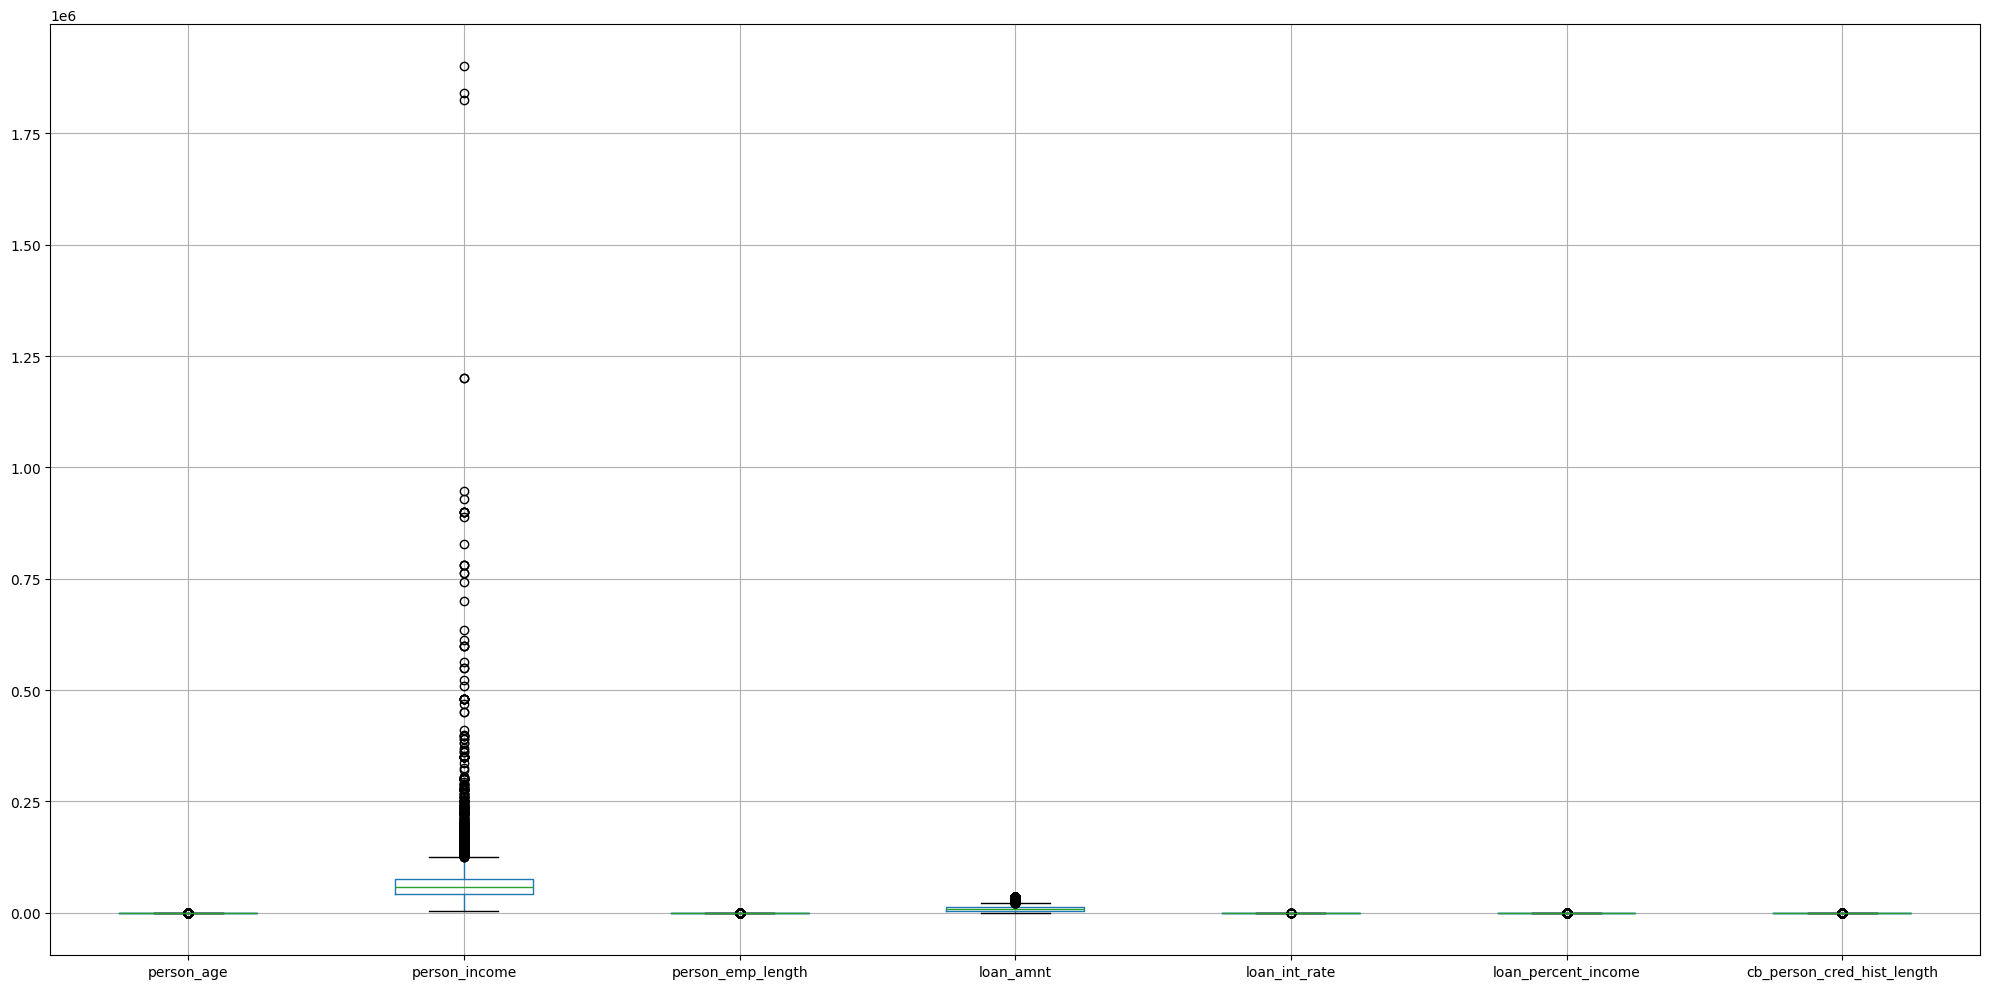

In [7]:
# Visualizing the outliers using boxplots.
loan_df.select_dtypes(include='number').drop(['id','loan_status'],axis=1).boxplot(figsize=(20,10))
plt.tight_layout()
plt.show()

All the numerical variables have outliers with person_income being the most dominant.

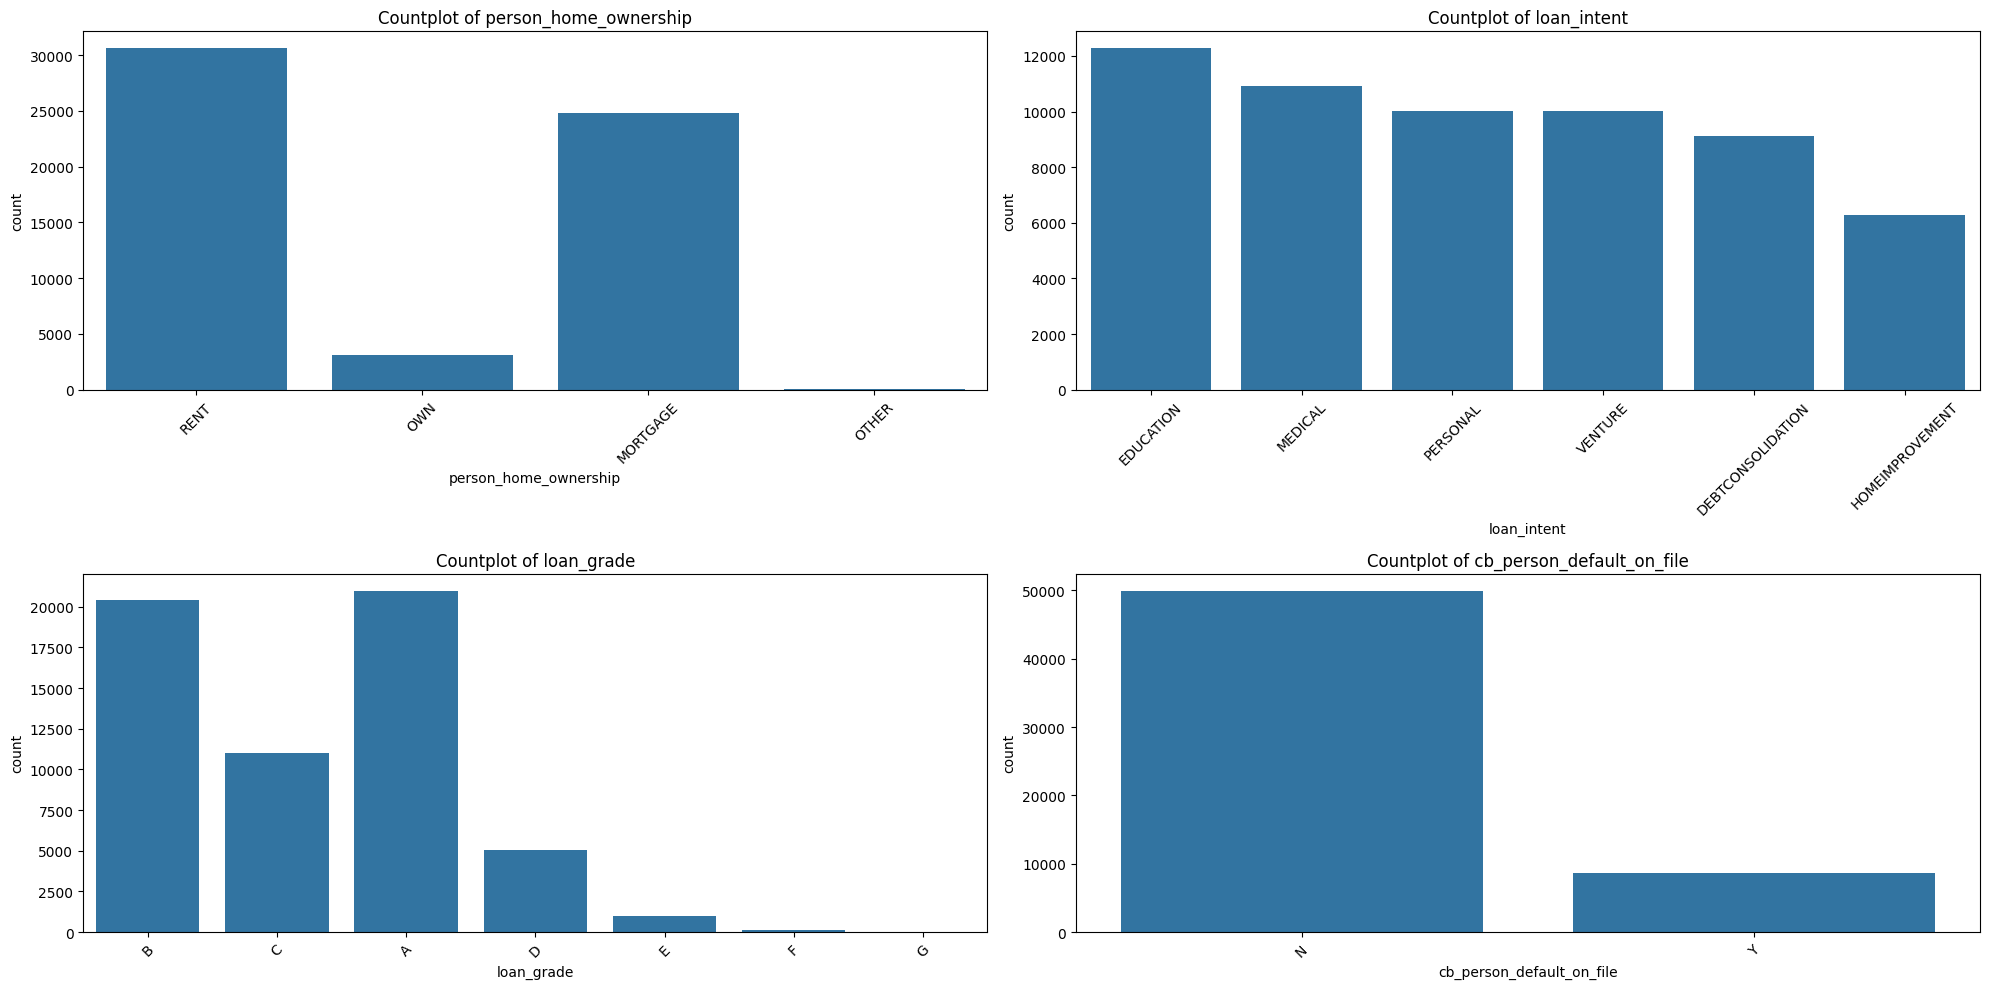

In [8]:
# Visualizing the categorical variables.

categorical_columns = loan_df.select_dtypes(include='object').columns
plt.figure(figsize=(20, 10))

# Looping through all categorical columns
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, (len(categorical_columns) + 1) // 2, i)
    sns.countplot(data=loan_df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Some of the categorical columns contain multiple categories. Trying to create new features to group some of the categorical values would help simplify the existing categories (i.e category binning).

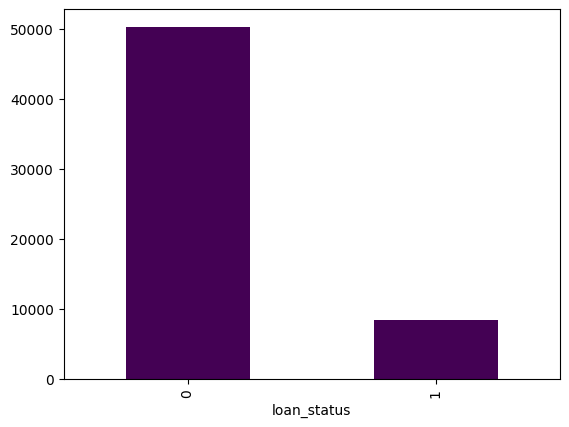

In [9]:
# Visualizing the target loan_status to see its distribution.
loan_df['loan_status'].value_counts().plot(kind='bar',colormap= 'viridis');

There is class imbalance when it comes to the target loan_status. The loan_status of 0 seems to be more dominant than 1.

##### Bivariate EDA

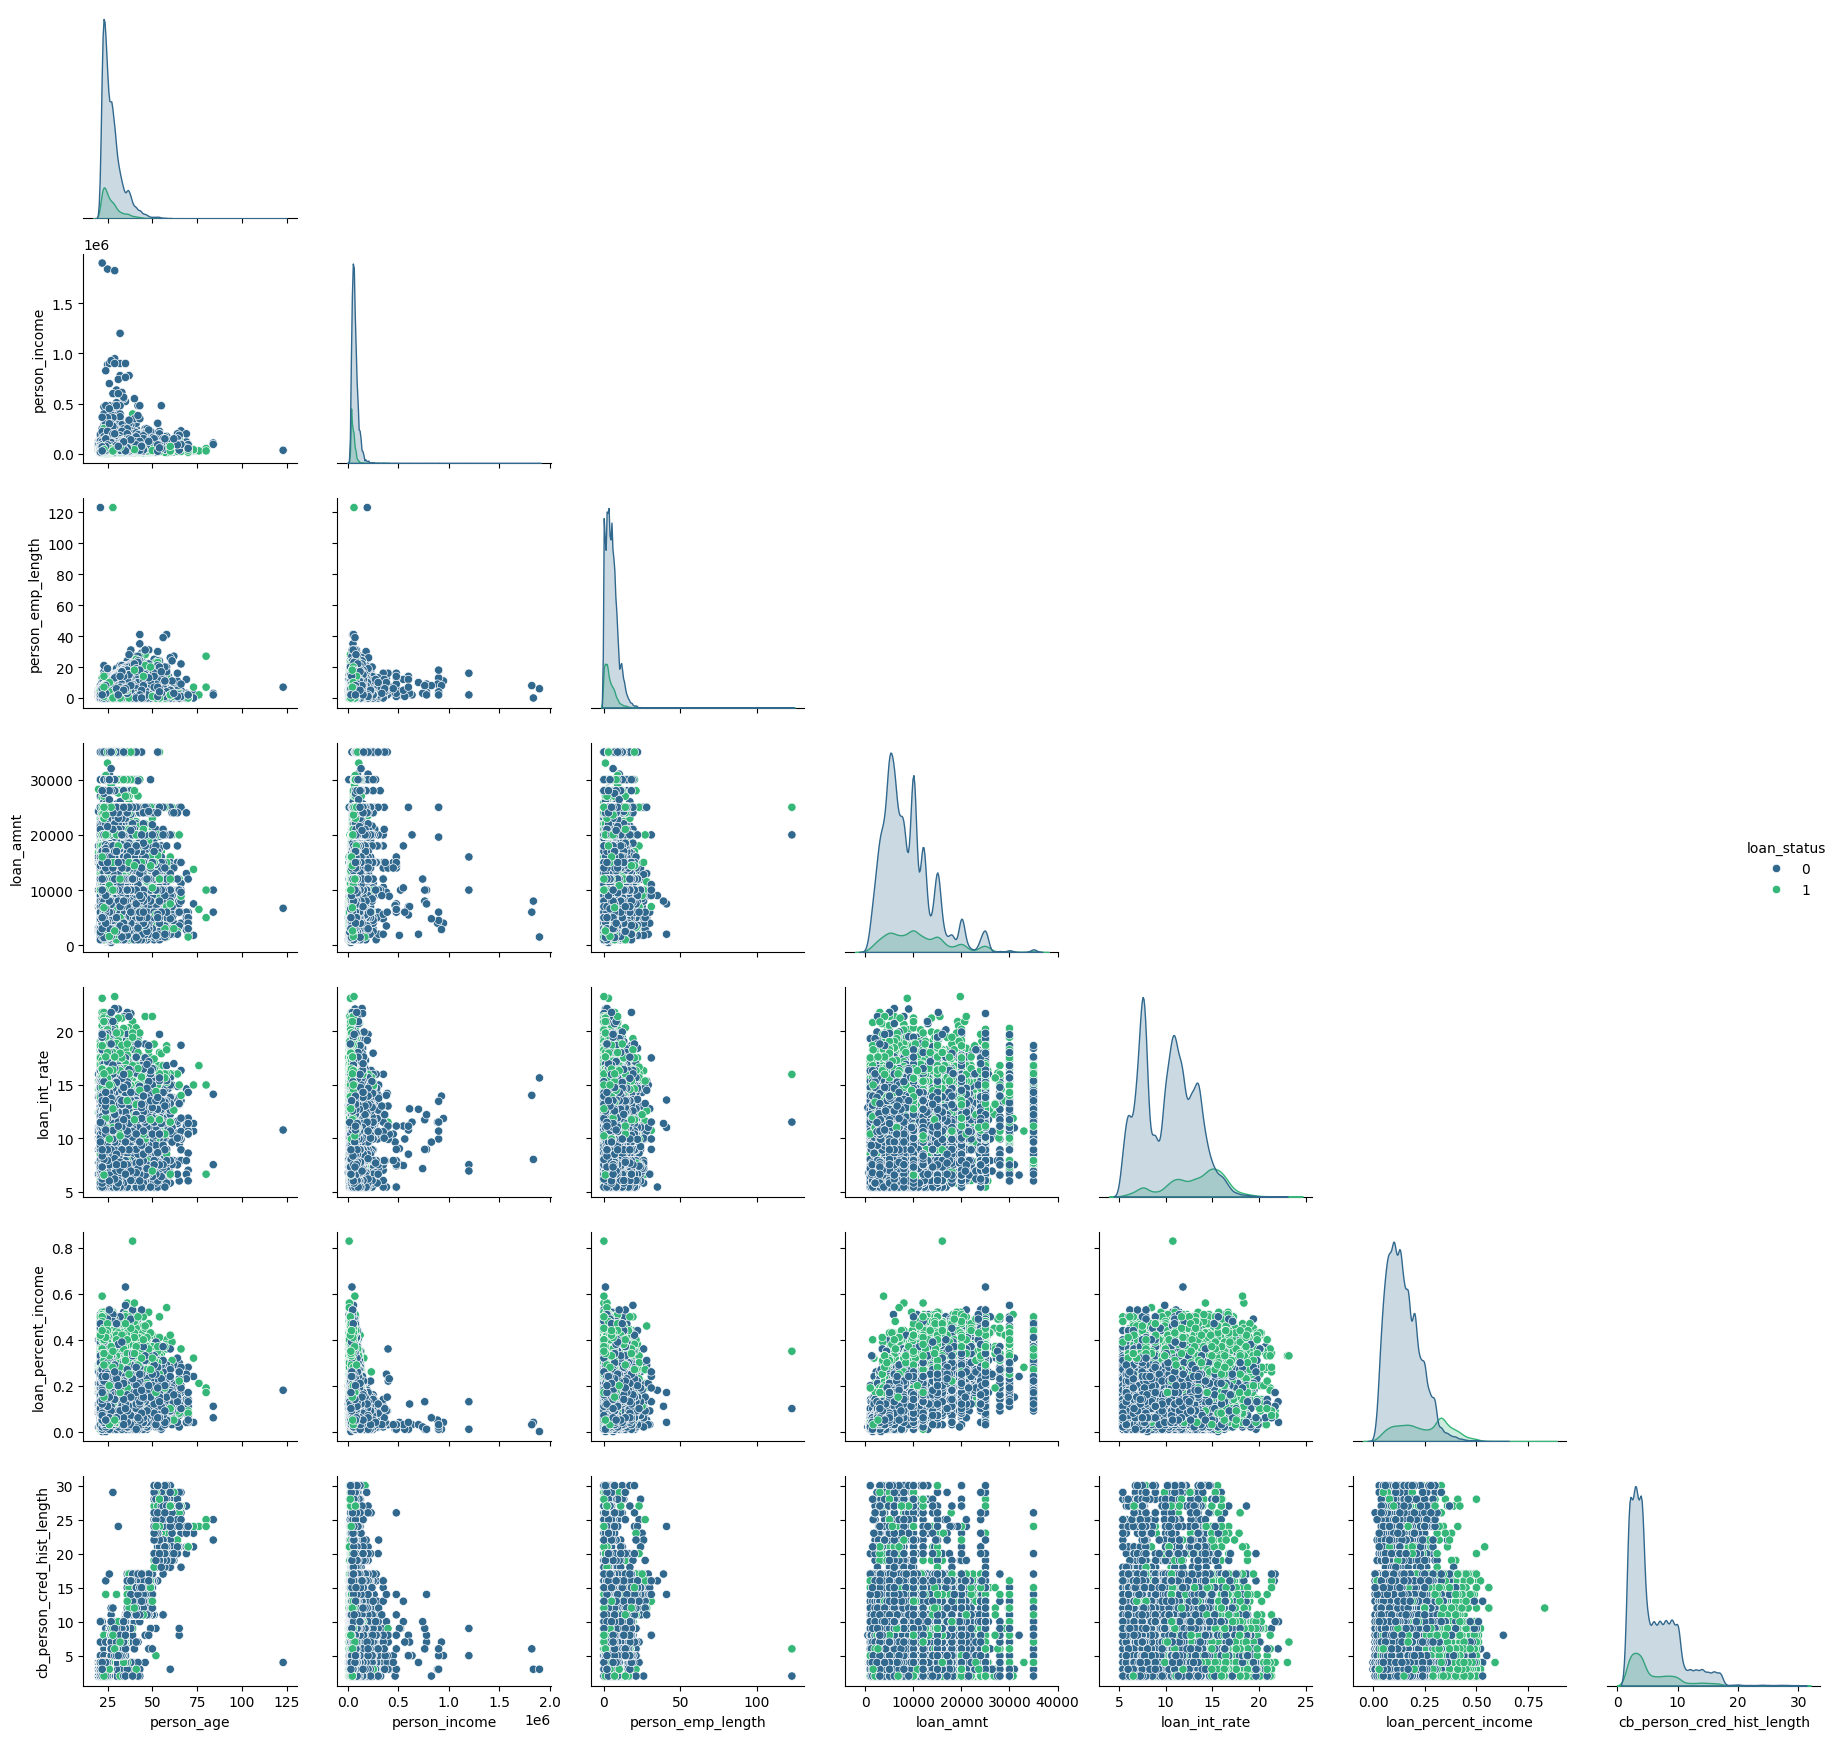

In [10]:
# Assesing numerical to numerical relationships between variables.
# Creating scatter plots to visualize the relationships between numerical variables.
numerical_scatter = loan_df.select_dtypes(include='number').drop('id',axis=1).columns
# Creating pairplots for the numerical columns.
sns.pairplot(loan_df[numerical_scatter],diag_kind='kde',corner=True,hue='loan_status',palette='viridis');
plt.tight_layout()
plt.show()

The scatter plot between person_age and cb_person_cred_hist_length appears to be linear. This is expected given that cb_person_cred_hist_length is expected to increase as the age increases.
The remaining plots have single clusters that appear compact and do not follow a clear trend. Normaly,this would indicate low variability but in this dataset,it may be due to the skewness of the variables that was witnessed earlier in univariate analysis.

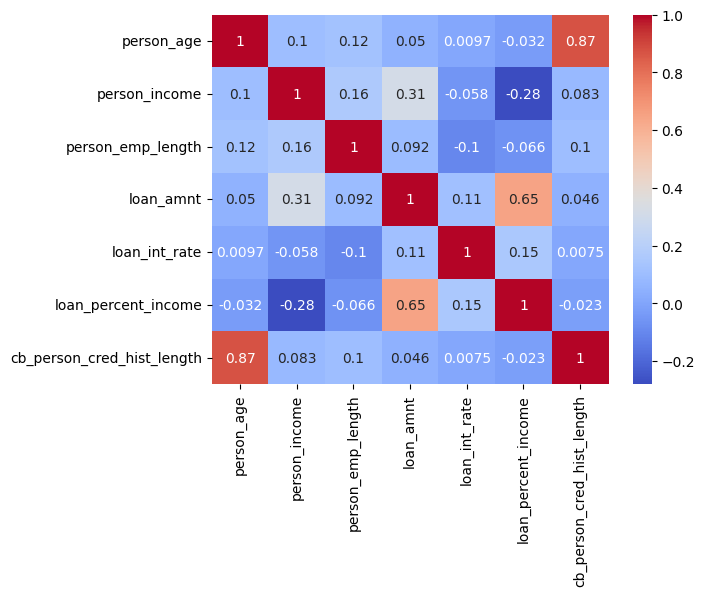

In [11]:
# Using heatmaps to visualize the correlation between numerical variables.
sns.heatmap(loan_df.select_dtypes(include='number').drop(['id','loan_status'],axis=1).corr(),annot= True,cmap='coolwarm');

cb_person_cred_hist_length and person_age seem to have a very strong correlation. It is advisable to drop one of these variables to reduce redundancy when modelling.

In [12]:
# Assessing categorical to categorical relationships between variables.
# Getting a list of the categorical columns.
cat_cols=loan_df.select_dtypes(include='object').columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

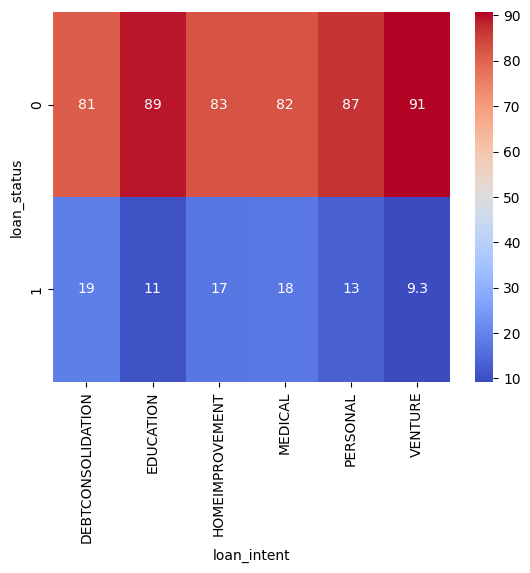

In [13]:
# loan_status will be considered categorical since it is binary.
# Investigating the relationship between loan_status and loan_intent.
cross_tab1 = pd.crosstab(loan_df['loan_status'],loan_df['loan_intent'])
# Calculating the column-wise percentages.
cross_tab1 = cross_tab1.div(cross_tab1.sum(axis=0),axis=1)*100
sns.heatmap(cross_tab1,annot=True,cmap='coolwarm');
plt.show();

91% of the people who borrow loans for venture purposes are not granted any loan. This is closely followed by people who borrow loans for education purposes. 89% of them are denied loans.

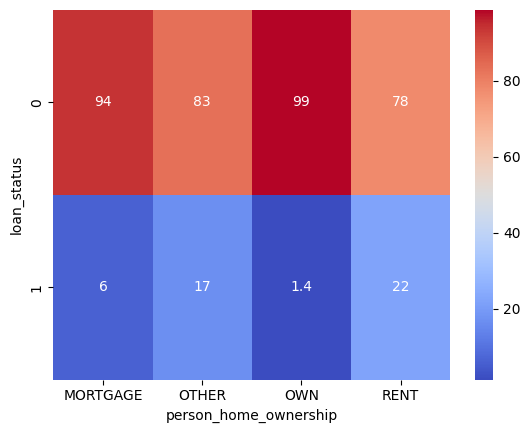

In [14]:
# Investigating the relationship between person_home_ownership and loan_status.
cross_tab2 = pd.crosstab(loan_df['loan_status'],loan_df['person_home_ownership'])
# Calculating the column-wise percentages.
cross_tab2 = cross_tab2.div(cross_tab2.sum(axis=0),axis=1)*100
sns.heatmap(cross_tab2,annot=True,cmap='coolwarm')
plt.show()

It can be noted that most percentage of people who own homes are denied loans. This however is not the case for those who rent homes as a higher percentage of them (22%) are granted loans.

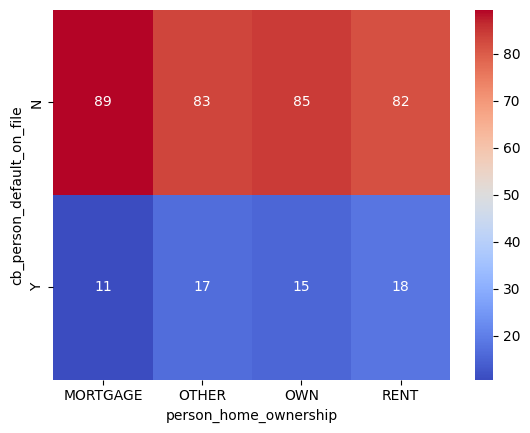

In [15]:
# Investigating the relationship between cb_person_default_on_file and person_home_ownership.
cross_tab3 = pd.crosstab(loan_df['cb_person_default_on_file'],loan_df['person_home_ownership'])
# Calculating the column-wise percentages.
cross_tab3 = cross_tab3.div(cross_tab3.sum(axis=0),axis=1)*100
sns.heatmap(cross_tab3,annot=True,cmap='coolwarm')
plt.show();

89% percent of people who have mortgage ownership tend to default on paying loans.

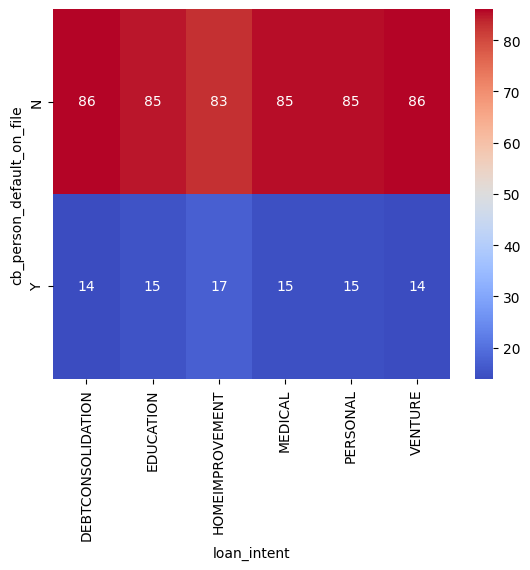

In [16]:
# Investigating the relationship between cb_person_default_on_file and loan_intent.
cross_tab4 = pd.crosstab(loan_df['cb_person_default_on_file'],loan_df['loan_intent'])
# Calculating the column-wise percentages.
cross_tab4 = cross_tab4.div(cross_tab4.sum(axis=0),axis=1)*100
sns.heatmap(cross_tab4,annot=True,cmap='coolwarm')
plt.show();

86% of people whose loan intent is venture have a history of defaulting. This also applies to those whose intent is debt cosnolidation.

In [17]:
# Assessing numerical to categorical relationships between variables.
# Extracting the categorical columns
cat_cols = loan_df.select_dtypes(include='object').columns
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [18]:
# Getting a list of the numerical columns
# loan_status is considered categorical since it is binary
num_cols = loan_df.select_dtypes(include='number').drop('id',axis=1).columns
num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')

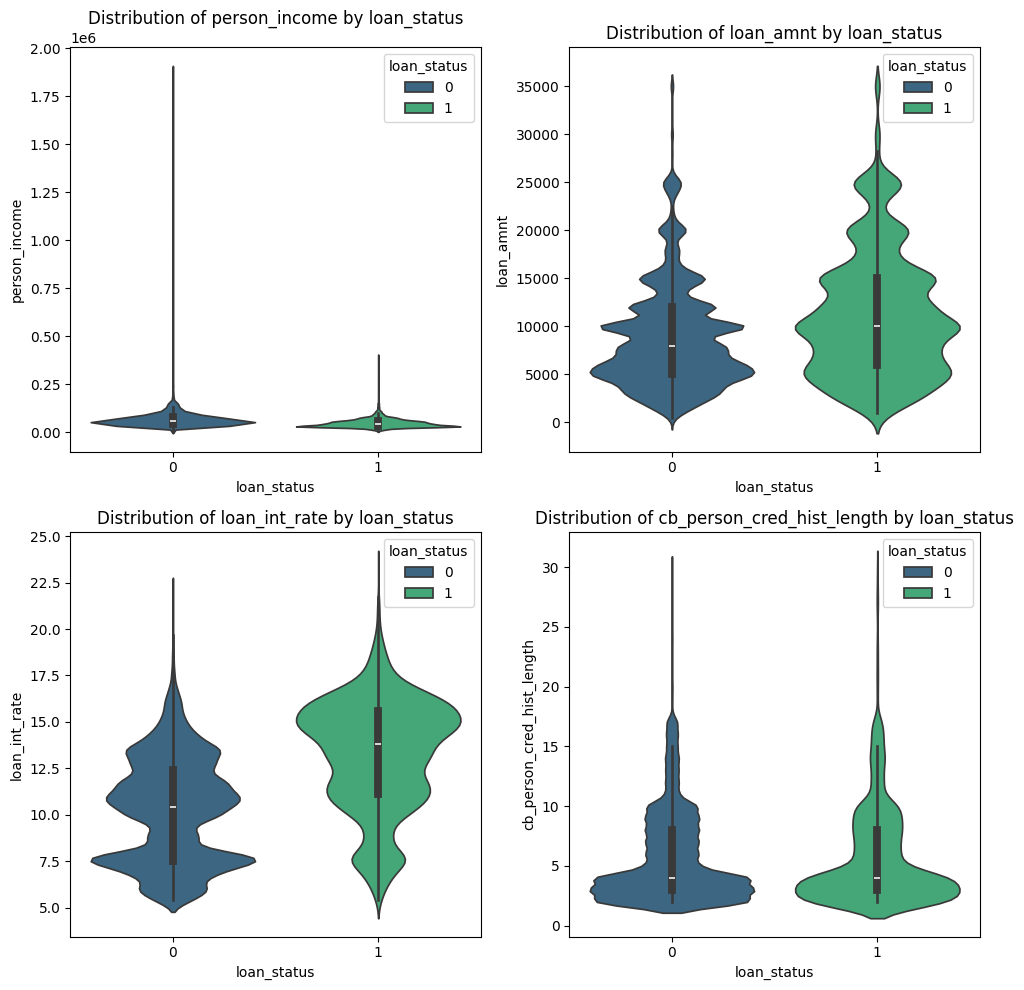

In [19]:
# Visualizing violinplots for loan status with different numerical variables
list_num_cols = ['person_income', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
plt.figure(figsize=(10,10))
# Creating a for loop to visualize all the relationships at once.
for i,col in enumerate(list_num_cols,1):
  plt.subplot(2, (len(list_num_cols)+1) // 2, i)
  sns.violinplot(data=loan_df,x='loan_status',y=col,palette='viridis',hue='loan_status')
  plt.title(f'Distribution of {col} by loan_status')

plt.tight_layout()
plt.show();

- From the violin plots it can be seen that most people who are granted loans are granted at a high interest rate (above 12%).

- It can also be seen that most people who are granted loans are granted an amount of Ksh.10,000 or below.

##### Multivariate EDA

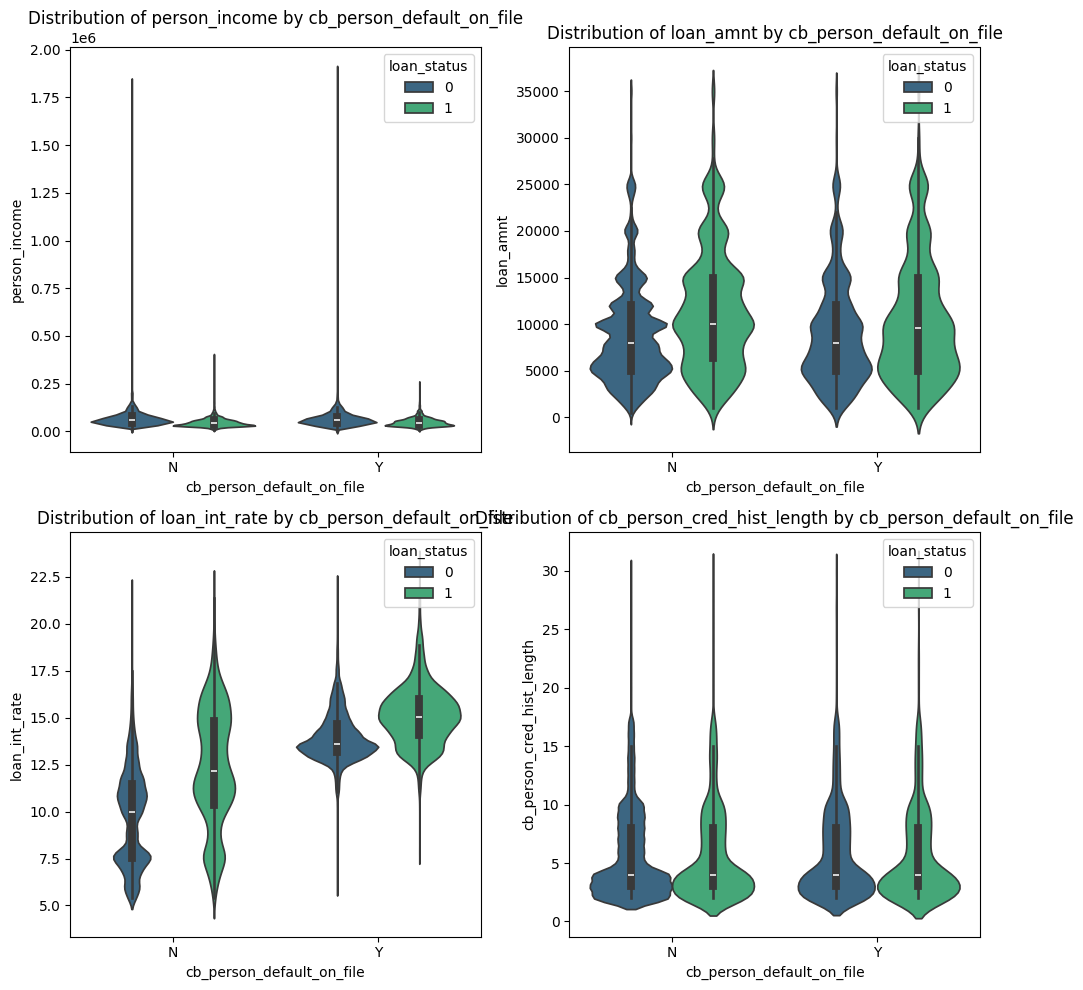

In [20]:
# Visualizing violinplots for cb_person_default_on_file with different numerical variables
list_num_cols = ['person_income', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
plt.figure(figsize=(10,10))
# Creating a for loop to visualize all the relationships at once.
for i,col in enumerate(list_num_cols,1):
  plt.subplot(2, (len(list_num_cols)+1) // 2, i)
  sns.violinplot(data=loan_df,x='cb_person_default_on_file',y=col,palette='viridis',hue='loan_status')
  plt.title(f'Distribution of {col} by cb_person_default_on_file')

plt.tight_layout()
plt.show();

- From the visuals it can be seen that most customers who have a loan_default history are granted a loan at higher interest rate.

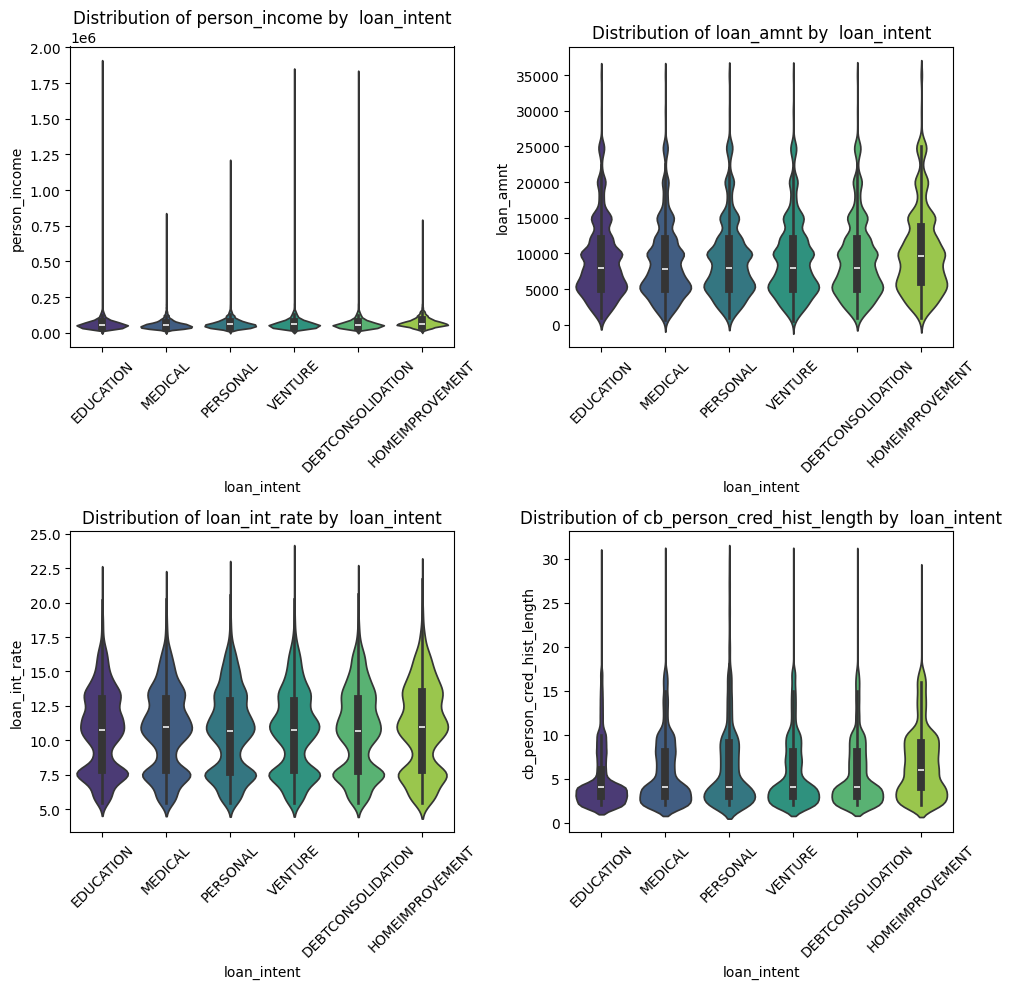

In [21]:
# Visualizing violinplots for loan_intent with different numerical variables
list_num_cols = ['person_income', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
plt.figure(figsize=(10,10))
# Creating a for loop to visualize all the relationships at once.
for i,col in enumerate(list_num_cols,1):
  plt.subplot(2, (len(list_num_cols)+1) // 2, i)
  sns.violinplot(data=loan_df,x='loan_intent',y=col,palette='viridis',hue='loan_intent')
  plt.title(f'Distribution of {col} by  loan_intent')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

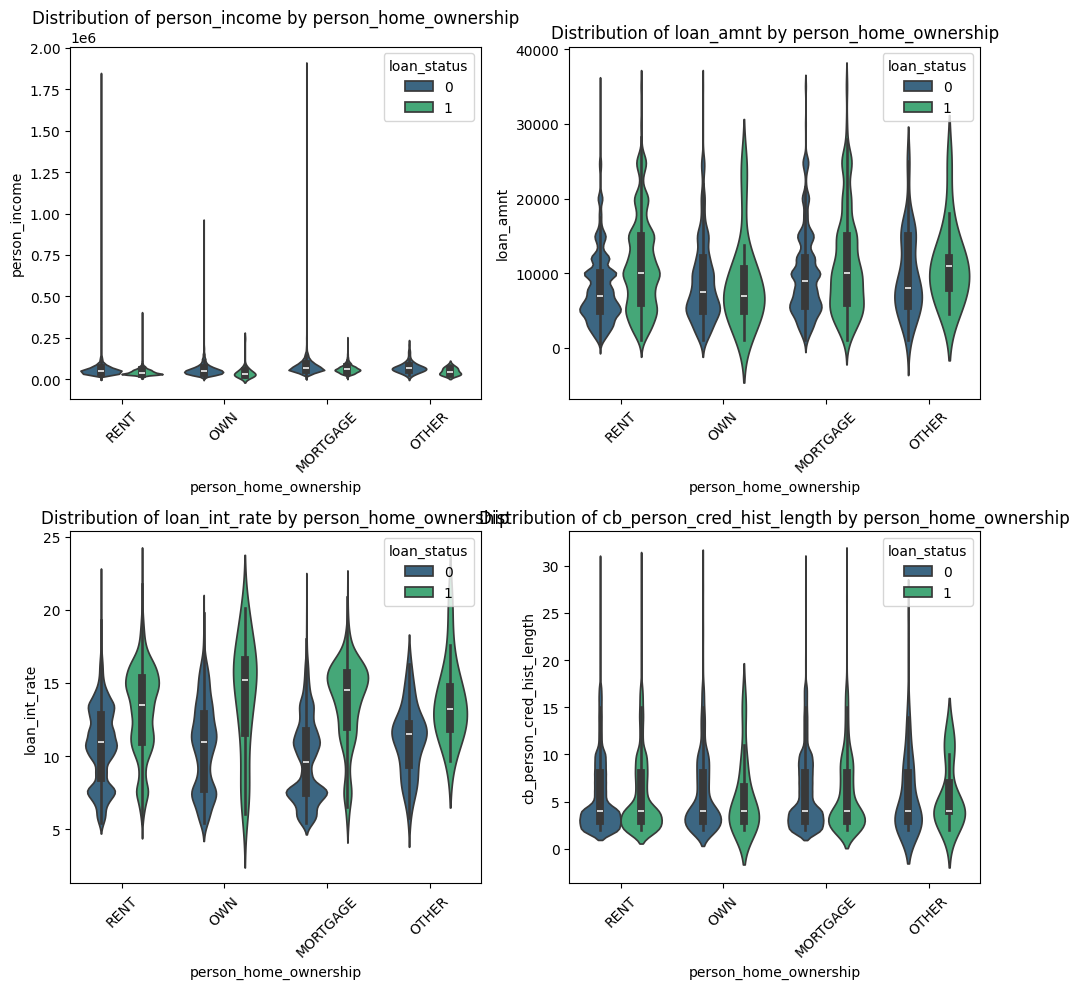

In [22]:
# Visualizing violinplots for person_home_ownership with different numerical variables
list_num_cols = ['person_income', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length']
plt.figure(figsize=(10,10))
# Creating a for loop to visualize all the relationships at once.
for i,col in enumerate(list_num_cols,1):
  plt.subplot(2, (len(list_num_cols)+1) // 2, i)
  sns.violinplot(data=loan_df,x='person_home_ownership',y=col,palette='viridis',hue='loan_status')
  plt.title(f'Distribution of {col} by person_home_ownership')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show();

- Most customers who have a rent or mortgage type of home ownership are granted loans at a high interest rate.

##### Data preparation

The dataset loan_df had no missing values or duplicates. Next step will be dealing with outliers which were seen to be very dominant in this dataset.

In [39]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [31]:
# Creating a copy of the loan_df
loan_df_no_outliers = loan_df.copy()
# Iterating through all the numerical columns in loan_df
for column in loan_df.select_dtypes(include='number').drop(['id','loan_status'],axis=1).columns:
  # Computing the IQR for the specific column
  Q1 = loan_df[column].quantile(.25)
  Q3 = loan_df[column].quantile(.75)
  IQR = Q3-Q1

  # Defining the upper and lower bounds
  upper_bound = Q3 + 1.5*IQR
  lower_bound = Q1 - 1.5*IQR
  # Removing the outliers
  loan_df_no_outliers[column] = loan_df_no_outliers[column].where((loan_df[column] >= lower_bound) & (loan_df[column] <= upper_bound))

loan_df_no_outliers.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0
1,1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0
2,2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0
3,3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0
4,4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0


In [33]:
# Checking for missing values
loan_df_no_outliers.isna().sum()

,0
id,0
person_age,2446
person_income,2411
person_home_ownership,0
person_emp_length,1274
loan_intent,0
loan_grade,0
loan_amnt,2045
loan_int_rate,34
loan_percent_income,1210


In [35]:
# Dropping the missing values
loan_df_no_outliers = loan_df_no_outliers.dropna()
loan_df_no_outliers.isna().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [36]:
# Taking a look at the descriptive statistics
loan_df_no_outliers.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,49882.000000,49882.000000,49882.000000,49882.000000,49882.000000,49882.000000,49882.000000,49882.000000,49882.000000
mean,29258.815926,26.349485,58888.569263,4.392005,8386.891103,10.618996,0.153148,5.082976,0.128604
std,16921.191676,4.194200,23167.423848,3.373173,4500.792722,3.009507,0.081244,3.027005,0.334764
min,0.000000,20.000000,4200.000000,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14606.250000,23.000000,41000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29226.000000,25.000000,55000.000000,4.000000,7800.000000,10.740000,0.140000,4.000000,0.000000
75%,43894.750000,29.000000,72000.000000,7.000000,11000.000000,12.980000,0.200000,7.000000,0.000000
max,58644.000000,40.000000,126000.000000,14.000000,22500.000000,20.620000,0.390000,15.000000,1.000000


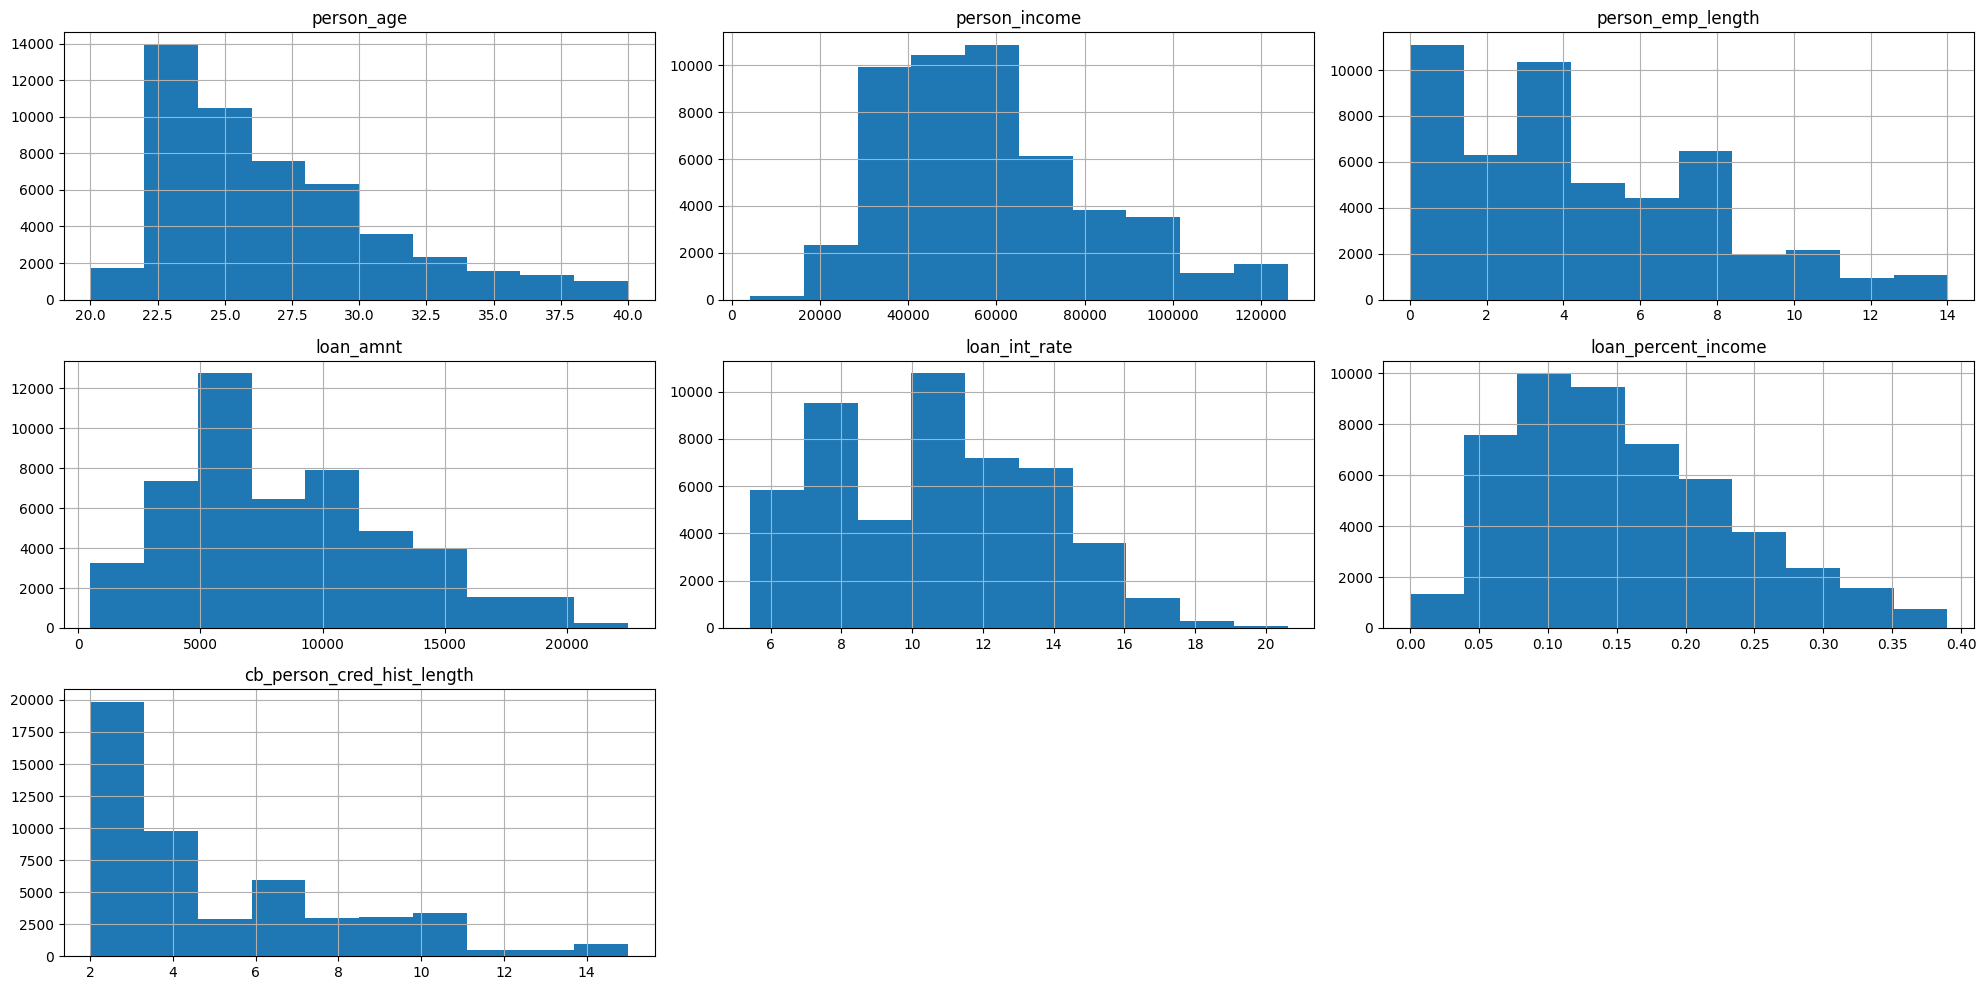

In [38]:
# Plotting to see the distribution of the numerical variables
loan_df_no_outliers.drop(['id','loan_status'],axis=1).hist(figsize=(20,10))
plt.tight_layout()
plt.show();

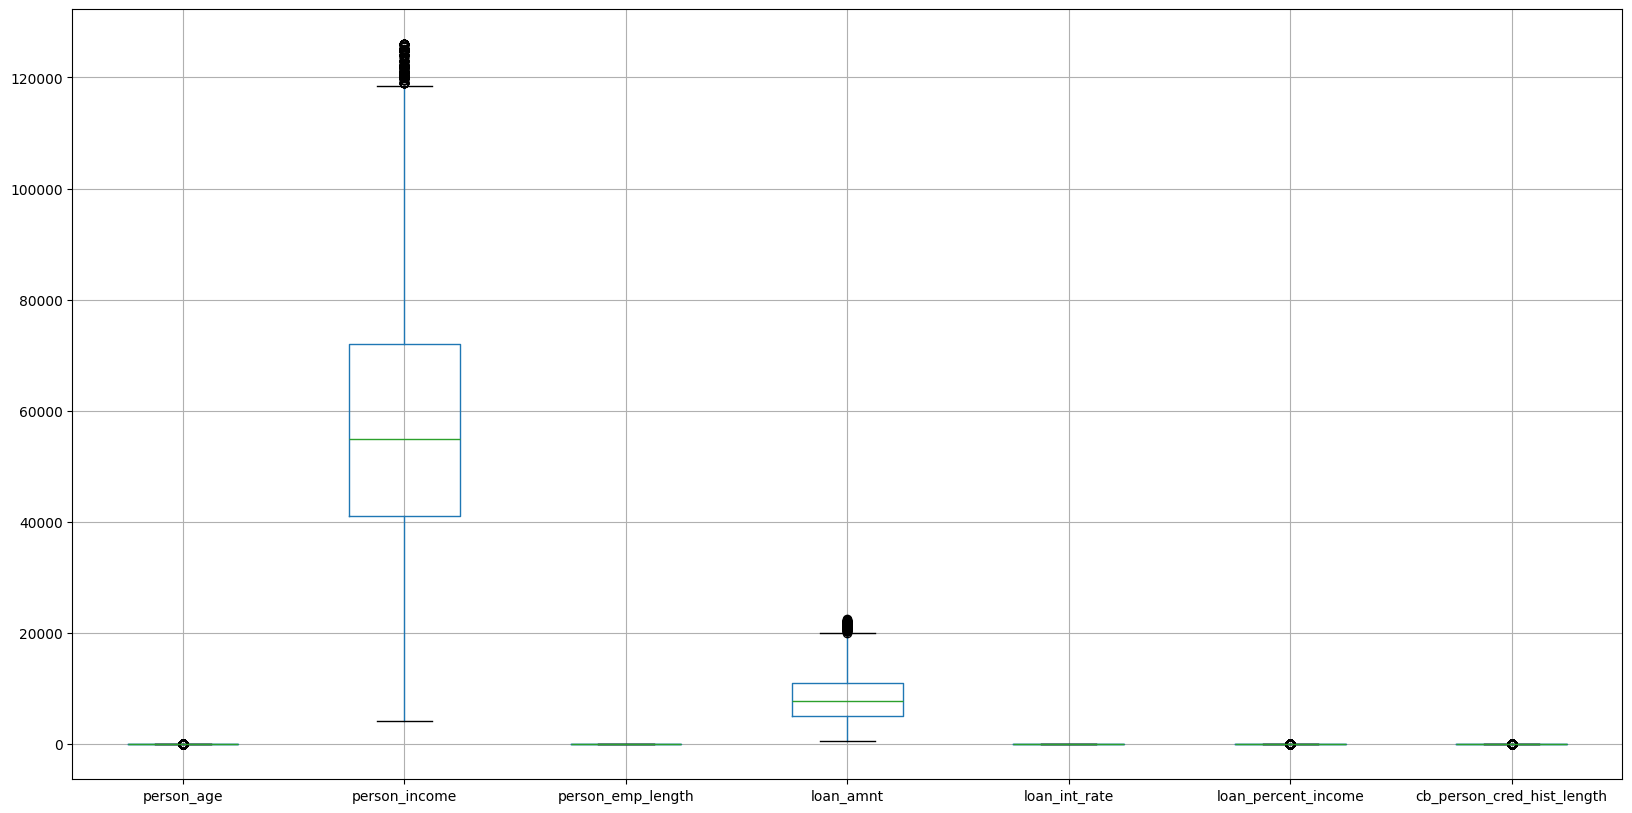

In [40]:
# Visualizing the outliers using boxplots
loan_df_no_outliers.select_dtypes(include='number').drop(['id','loan_status'],axis=1).boxplot(figsize=(20,10))
plt.show()

Next we will perform category binning to reduce high cardinality in some of the categorical variables.


In [ ]:
# Binning some of the categories in the categorical columns